In [2]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
rng = core.GSLRandomNumberGenerator()

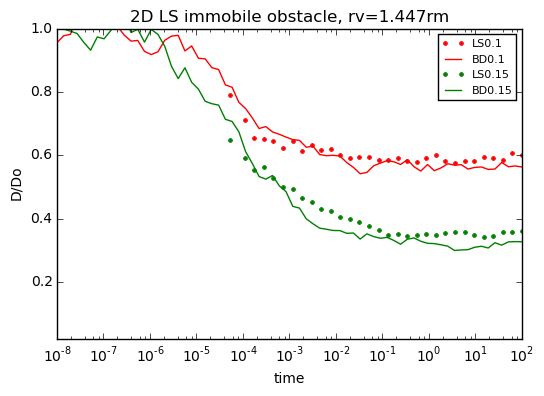

In [3]:
f2,ax2 = plt.subplots(1)

phis = [0.1,0.15]
def plotmsd1(phi):
    dat = np.loadtxt('data/2Dcrowding_LS_phi'+str(phi)+'rv1.447rm.csv',delimiter=',')   
    msd = dat[:,1]#[gen_log_space(len(dat),100)[:-1]]
    t = dat[:,0]#[gen_log_space(len(dat),100)[:-1]]
    D = 1
    Dt = msd[1:]/t[1:]/4./D
    ax2.semilogx(t[1:],Dt,'.',color=c,label='LS'+str(phi))
    return 

def plotmsd2(phi):
    dat = np.loadtxt('data/2Dcrowding_BD_phi'+str(phi)+'_run3.csv',delimiter=',')   
    msd = dat[:,1]#[gen_log_space(len(dat),100)[:-1]]
    t = dat[:,0]#[gen_log_space(len(dat),100)[:-1]]
    D = 1
    Dt = msd[1:]/t[1:]/4./D
    ax2.semilogx(t[1:],Dt,'-',color=c,label='BD'+str(phi))
    return 

de = []
clrs = ['r','g','k','b']
for p,c in zip(phis,clrs):
    plotmsd1(p)
    plotmsd2(p)
    
ymin = 0.02
ymax = 1.
ax2.set_ylim(ymin,ymax)
#ax2.set_yticks(np.arange(ymin,ymax,0.1))
ax2.set_xlabel("time")
ax2.set_ylabel("D/Do")    
ax2.legend(loc='best',fontsize='8')  
ax2.set_title('2D LS immobile obstacle, rv=1.447rm')
f2.savefig("figure/2DLSBD_immobileCrowders_Deff_t.png",format='png',dpi=200)

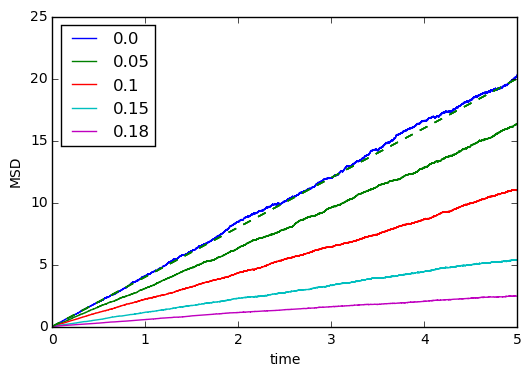

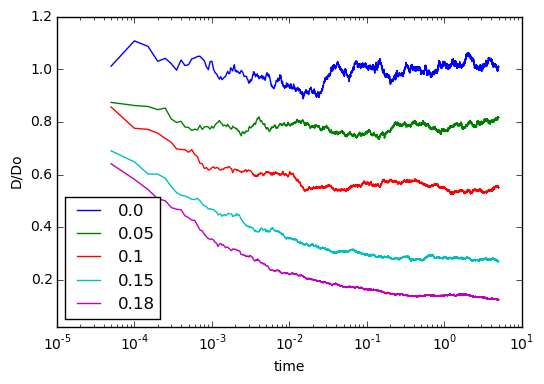

In [4]:
f1,ax1 = plt.subplots(1)
f2,ax2 = plt.subplots(1)

phis = [0.0,0.05,0.1,0.15,0.18]

def plotmsd(phi):
    #dat = np.loadtxt('data/BDphi'+str(phi)+'/2Dcrowding_BD_phi'+str(phi)+'.csv',delimiter=',')  
    dat = np.loadtxt('data/2Dcrowding_BD_phi'+str(phi)+'_run2.csv',delimiter=',')   
    msd = dat[:,1]
    t = dat[:,0]
    ax1.plot(t,msd,label=str(phi))
    D = 1
    ax1.plot(t,4*D*t,'g--')
    Dt = msd[1:]/t[1:]/4./D
    ax2.semilogx(t[1:],Dt,label=str(phi))
    deff = Dt[(t>1)[1::]]
    return np.mean(deff)

de = []
for p in phis:
    mean = plotmsd(p)
    de.append(mean)
    ax1.set_xlabel("time")
    ax1.set_ylabel("MSD")  
    ymin = 0.02
    ymax = 1.2
    ax2.set_ylim(ymin,ymax)
    #ax2.set_yticks(np.arange(ymin,ymax,0.1))
    ax2.set_xlabel("time")
    ax2.set_ylabel("D/Do")    
    ax1.legend(loc='best')
    ax2.legend(loc='best')  


In [5]:
#f1.savefig("figure/2DBD_diffusion_MSD_t.png",format='png',dpi=100)    
#f2.savefig("figure/2DBD_diffusion_Deff_t.png",format='png',dpi=100)

In [6]:
print phis
print de

[0.0, 0.05, 0.1, 0.15, 0.18]
[1.0209596548404438, 0.7966287535422778, 0.53997327720399901, 0.27771066456853477, 0.13324651239743326]


phi [0.0, 0.05, 0.1, 0.15, 0.18]
Deff [1.0209596548404438, 0.7966287535422778, 0.53997327720399901, 0.27771066456853477, 0.13324651239743326]


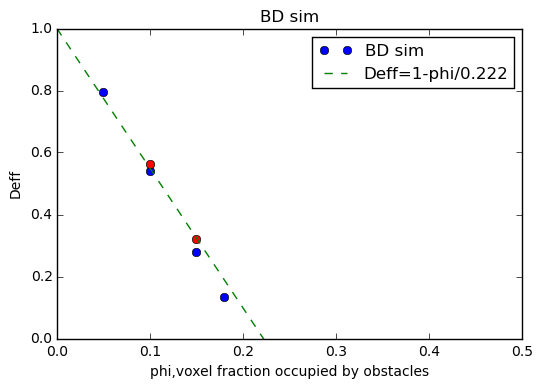

In [7]:
import scipy
from scipy.optimize import curve_fit
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

#de = [0.94830140592077317, 0.67515725372187418, 0.42724170618727503, 0.20667644039049163, 0.081817752936242369, 0.032423098951908771]
#phis = [0.0, 0.05, 0.1, 0.15, 0.18, 0.2]

def lin(x,m,c):
    return m*x+c 
c1,c2 = curve_fit(lin,phis,de)
#plt.plot(xx,[c1[0]*i+c1[1] for i in xx],'--',label='BD sim fit')
plt.plot(phis,de,'o',label='BD sim')
plt.plot([0.1,0.15],[0.564,0.32],'ro')
xx = np.linspace(phis[0],0.24,10)
#plt.plot(xx,[c1[0]*i+c1[1] for i in xx],'--',label='BD sim fit')
phic = 0.222
plt.plot(xx,[(-1./phic)*i+1. for i in xx],'--',label='Deff=1-phi/'+str(phic))
plt.title('BD sim')
t=np.linspace(0,1,10)
plt.xlabel('phi,voxel fraction occupied by obstacles')
plt.ylabel('Deff')
plt.xlim(0,0.5)
plt.ylim(0.0,1)
plt.legend()
print 'phi',phis
print 'Deff',de
#print 'phic=',-1./slope
#plt.savefig("figure/2DBD_diffusion_Deff_phi.png",format='png',dpi=100)
plt.show()

phi [0.0, 0.05, 0.1, 0.15, 0.18]
Deff [1.0209596548404438, 0.7966287535422778, 0.53997327720399901, 0.27771066456853477, 0.13324651239743326]


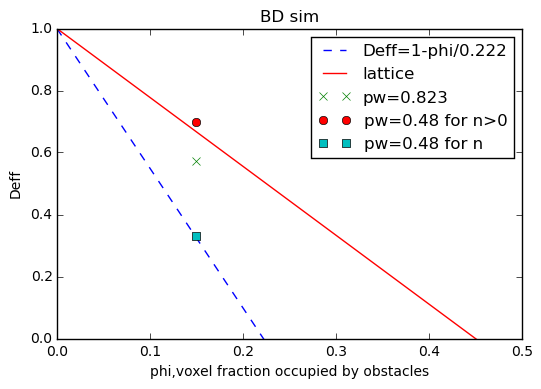

In [8]:
import scipy
from scipy.optimize import curve_fit
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

#de = [0.94830140592077317, 0.67515725372187418, 0.42724170618727503, 0.20667644039049163, 0.081817752936242369, 0.032423098951908771]
#phis = [0.0, 0.05, 0.1, 0.15, 0.18, 0.2]

def lin(x,m,c):
    return m*x+c 
c1,c2 = curve_fit(lin,phis,de)
#plt.plot(xx,[c1[0]*i+c1[1] for i in xx],'--',label='BD sim fit')
#plt.plot(phis,de,'o',label='BD sim')
#plt.plot([0.1,0.15],[0.564,0.32],'ro')
xx = np.linspace(phis[0],0.24,10)
#plt.plot(xx,[c1[0]*i+c1[1] for i in xx],'--',label='BD sim fit')
phic = 0.222
plt.plot(xx,[(-1./phic)*i+1. for i in xx],'--',label='Deff=1-phi/'+str(phic))
plt.title('BD sim')
t=np.linspace(0,1,10)
plt.plot(t,[1-i/0.45 for i in t],'r-',label='lattice')
plt.xlabel('phi,voxel fraction occupied by obstacles')
plt.ylabel('Deff')
plt.xlim(0,0.5)
plt.ylim(0.0,1)
plt.plot(0.15,0.574,'x',label='pw=0.823')
plt.plot(0.15,0.7,'o',label='pw=0.48 for n>0')
plt.plot(0.15,0.33,'s',label='pw=0.48 for n')
#plt.plot(0.15,0.574/0.823,'gs')
#plt.plot([0.,  0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45],
#         [0.97,0.82,0.66,0.54,0.43,0.28,0.22,0.14,0.08,0.02],'ko-')
dp = lambda n : (1-n/6)*(1+((1-(0.9069/0.44))*n/6))
deff = lambda phi: (1-phi/0.45)*dp(6*phi/0.9069)
#plt.plot(np.linspace(0,1,20),deff(np.linspace(0,1,20)),'k--')
plt.legend()
print 'phi',phis
print 'Deff',de
#print 'phic=',-1./slope
#plt.savefig("figure/2DBD_diffusion_Deff_phi.png",format='png',dpi=100)
plt.show()

In [9]:
p = lambda a: (1.-(a/0.222))/(1.-(a/0.45))
for i in range(6):
    phib = i*0.9069/6
    print phib,p(phib)
    

0.0 1.0
0.15115 0.480558356583
0.3023 -1.10203297407
0.45345 135.987074031
0.6046 5.01643299185
0.75575 3.53859583214


In [70]:
p = lambda a: (1.-(a/0.222))/(1.-(a/0.45))
F = lambda x,n: (math.factorial(6)/math.factorial(n)/math.factorial(6-n))*(x**n)*((1-x)**(6-n)) 
pw = lambda x,a,b: 1+a*(x**2)+b*x
def fx1(x,a,b):
    return F(x,0)+F(x,1)*pw(x,a,b)+F(x,2)*pw(x,a,b)+F(x,3)*pw(x,a,b)+F(x,4)*pw(x,a,b)+F(x,5)*pw(x,a,b)+F(x,6)*pw(x,a,b)
phi = np.linspace(0,0.222,50)
c1,c2 = curve_fit(fx1,phi,p(phi),bounds=(0,np.inf))
print c1,c2
print pw(0.1,1,1)
#plt.plot(phi,fx1(phi,c1[0],c1[1]))
#plt.plot(phi,p(phi),'.')
#plt.ylim(0,1)

[  3.27992141e-12   3.15742706e-12] [[ 560.2457101  -101.78579209]
 [-101.78579209   19.15862467]]
1.11


In [41]:
n=1
x=0.5
(math.factorial(6)/math.factorial(n)/math.factorial(6-n))*(x**n)*((1-x)**(6-n)) 

0.09375

In [24]:
(1.-(0.3023/0.45))

0.3282222222222222

In [27]:
a = 0.15115
(1.-(a/0.222)),(1.-(a/0.45))

(0.31914414414414416, 0.6641111111111111)

In [10]:
pc=0.222
a=6e-9
p = lambda n: 1+n*((a*pc-1)/(pc*(1-a*pc)))/6./a

# 

In [11]:
p(6)

-750750749.7507508

In [30]:
0.33+0.067*(0.48)

0.36216000000000004

In [31]:
6*(0.5)**6

0.09375

In [21]:
(5./6)**6

0.3348979766803842

[ 4.5045045]


(0, 0.5)

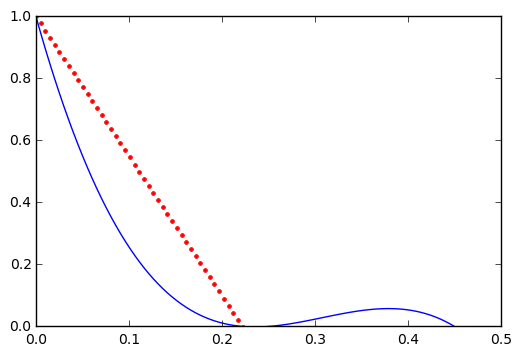

In [15]:
pcsb1 = 0.9069
pcsb2 = 0.45
gamma = pcsb1*0.5/0.222
D=1
dp = lambda n : D*(1+((n/6)*(n/6)*(gamma-1))-gamma*n/6)
deff = lambda phi: (1-phi/pcsb2)*dp(6*phi/pcsb1)
phis=np.linspace(0,0.5,100)
phic = 0.222
dbd = [(-1./phic)*i+1. for i in phis]
def fx(x,a):
    return (1-x/0.45)*(a*x*x+(4.51+a/4.5)*x+1) 
def fx2(x,a):
    return (1-x/0.45)*(1-a*x)*(((a*phic-1)/(phic-a*(phic**2)))*x+1)
c1,c2 = curve_fit(fx2,phis,dbd,bounds=(1./phic,np.inf))
print c1
plt.plot(phis,fx2(phis,c1[0]))
#plt.plot(phis,deff(phis),'.')
plt.plot(phis,dbd,'r.',label='Deff=1-phi/'+str(phic))
plt.ylim(0,1)
plt.xlim(0,0.5)

In [17]:
for i in range(7):
    print f(i)

1.0
0.568585643213
-1.55709342561
-200.0
14.9305555556
18.4615384615
78.5714285714


In [18]:
1./0.222/0.222/4.5

4.5090135180225275